In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 435.7 kB/s eta 0:05:45
   ---------------------------------------- 0.1/150.0 MB 595.3 kB/s eta 0:04:12
   ---------------------------------------- 0.2/150.0 MB 654.6 kB/s eta 0:03:49
   ---------------------------------------- 0.2/150.0 MB 701.4 kB/s eta 0:03:34
   ---------------------------------------- 0.2/150.0 MB 689.6 kB/s eta 0:03:38
   ---------------------------------------- 0.3/150.0 MB 922.8 kB/s eta 0:02:43
   ----------------------------

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.datasets import load_diabetes, load_iris, load_wine
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)
from typing import List, Optional, Tuple, Union
from xgboost import XGBClassifier, XGBRegressor

In [6]:
# Cargamos el dataset de la práctica final

df_data = pd.read_csv("data/dataset_practica_final.csv")
df_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Variables

| Nombre Variable                  | Descripción                                              |
| -------------------------------- | -------------------------------------------------------- |
| `hotel`                          | Tipo de hotel: City Hotel o Resort Hotel                 |
| `is_canceled`                    | Variable objetivo: 1 si fue cancelado, 0 si no           |
| `lead_time`                      | Días entre la reserva y la fecha de llegada              |
| `arrival_date_year`              | Año de llegada                                           |
| `arrival_date_month`             | Mes de llegada                                           |
| `arrival_date_week_number`       | Número de la semana del año                              |
| `arrival_date_day_of_month`      | Día del mes de llegada                                   |
| `stays_in_weekend_nights`        | Noches de fin de semana reservadas                       |
| `stays_in_week_nights`           | Noches entre semana reservadas                           |
| `adults`                         | Número de adultos                                        |
| `children`                       | Número de niños                                          |
| `babies`                         | Número de bebés                                          |
| `meal`                           | Tipo de comida reservada                                 |
| `country`                        | País de origen del cliente                               |
| `market_segment`                 | Canal de marketing (online, offline, grupos...)          |
| `distribution_channel`           | Canal de distribución (directo, TA/TO...)                |
| `is_repeated_guest`              | 1 si el cliente ha estado anteriormente                  |
| `previous_cancellations`         | Nº de cancelaciones anteriores                           |
| `previous_bookings_not_canceled` | Nº de reservas previas no canceladas                     |
| `reserved_room_type`             | Tipo de habitación reservada                             |
| `assigned_room_type`             | Tipo de habitación asignada                              |
| `booking_changes`                | Nº de cambios en la reserva                              |
| `deposit_type`                   | Tipo de depósito: No Deposit, Refundable, etc.           |
| `agent`                          | ID del agente (puede ser nulo)                           |
| `company`                        | ID de la empresa (puede ser nulo)                        |
| `days_in_waiting_list`           | Días en lista de espera                                  |
| `customer_type`                  | Tipo de cliente: Transient, Group, etc.                  |
| `adr`                            | Average Daily Rate (precio promedio por noche)           |
| `required_car_parking_spaces`    | Plazas de parking solicitadas                            |
| `total_of_special_requests`      | Nº de peticiones especiales                              |
| `reservation_status`             | Estado final de la reserva: Check-Out, Canceled, No-Show |
| `reservation_status_date`        | Fecha en que se actualizó el estado                      |


In [7]:
target_column = 'is_canceled'
list_independent_variables = df_data.drop(columns=target_column).columns.to_list()
list_independent_variables

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# Vemos un poco que contiene cada columna y que tipos de variables vamos a manejar
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Sacamos las siguientes intuiciones de los valores nulos que hemos sacado del info():

| Nombre Variable | Estudio Preliminar |
|---|---|
| `children` | Contiene valores nulos, no son muchos por lo que podríamos completar aquellos que falten con la media o la moda. |
| `country` | Ocurre la misma situación que con children, tiene valores nulos y habría que ver qué hacemos con ellos. |
| `agent` | Tiene valores nulos pero según la descripción puede tomar valores nulos. |
| `company` | Tiene valores nulos, habría que ver qué hacer en este caso puesto que son muchos los valores nulos. |

In [ ]:
df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
df_data.describe(include='object').transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


Ahora buscaremos que variables son aquellas que mayor impacto tienen en nuestra variable objetivo. Esto se puede ver con el método correlation. Este método segun su documentación solo recibe valores numéricos por lo que tendremos que decidir que hacemos con las variables categóricas, strings, fechas y con aquellas columnas que hemos visto que tienen valores nulos. Comenzaremos procesando las varibles categóricas y objects que tenemos.

In [8]:
df_data_preprocessed = df_data.copy()
df_data_preprocessed

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
# Empezamos por el preprocesamiento de la variable hotel
df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['hotel'], drop_first=True, dtype=int)
# df_data_preprocessed['hotel_Resort Hotel'] = df_data_preprocessed['hotel_Resort Hotel'].astype('int64')
df_data_preprocessed['hotel_Resort Hotel']

0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: hotel_Resort Hotel, Length: 119390, dtype: int32

In [ ]:
# Ahora pasamos con arrival date month
month_list = df_data_preprocessed['arrival_date_month'].unique().tolist()
month_list

['July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June']

In [10]:
# ahora con comprehensions y recorriendo la lista sustituimos cada mes
month_correspondance = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df_data_preprocessed['arrival_date_month'] = df_data_preprocessed['arrival_date_month'].replace(month_correspondance)
df_data_preprocessed['arrival_date_month']

# df_data['arrival_date_month'] = [df_data['arrival_date_month'].replace({month_list[month]: month}) for month in range(len(month_list))]

C:\Users\gaizk\AppData\Local\Temp\ipykernel_3604\3515586782.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_preprocessed['arrival_date_month'] = df_data_preprocessed['arrival_date_month'].replace(month_correspondance)


0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 119390, dtype: int64

In [ ]:
# Ahora pasaremos con los tipos de habitaciones que puedes escoger y con las que son asignadas

df_data_preprocessed['assigned_room_type'].unique().tolist()

['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K']

In [ ]:
df_data_preprocessed['reserved_room_type'].unique().tolist()

['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']

In [11]:
# Viendo los posibles valores que se toman en ambas columnas definiremos un dict con los posibles valores que se toman de ambas listas


reserved_rooms = sorted(df_data_preprocessed['assigned_room_type'].unique().tolist())
rooms = {}
for i in range(len(reserved_rooms)):
    rooms[reserved_rooms[i]] = i

# rooms['I'] = 10
# rooms['K'] = 11

print(rooms)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'P': 11}


In [12]:
df_data_preprocessed['reserved_room_type'] = df_data_preprocessed['reserved_room_type'].replace(rooms)
df_data_preprocessed['assigned_room_type'] = df_data_preprocessed['assigned_room_type'].replace(rooms)

C:\Users\gaizk\AppData\Local\Temp\ipykernel_3604\2526571645.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_preprocessed['reserved_room_type'] = df_data_preprocessed['reserved_room_type'].replace(rooms)
C:\Users\gaizk\AppData\Local\Temp\ipykernel_3604\2526571645.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_preprocessed['assigned_room_type'] = df_data_preprocessed['assigned_room_type'].replace(rooms)


In [13]:
# df_data_preprocessed['reserved_room_type']
df_data_preprocessed['reserved_room_type'].unique().tolist()

[2, 0, 3, 4, 6, 5, 7, 10, 11, 1]

In [14]:
df_data_preprocessed['assigned_room_type'].unique().tolist()

[2, 0, 3, 4, 6, 5, 8, 1, 7, 11, 10, 9]

In [15]:
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [ ]:
df_data_preprocessed['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [16]:
meals = {'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}

df_data_preprocessed['meal'] = df_data_preprocessed['meal'].replace(meals)
df_data_preprocessed['meal']

C:\Users\gaizk\AppData\Local\Temp\ipykernel_3604\2739196554.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_preprocessed['meal'] = df_data_preprocessed['meal'].replace(meals)


0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    2
Name: meal, Length: 119390, dtype: int64

In [17]:
df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['market_segment'], dtype=int, drop_first=True)
df_data_preprocessed

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reservation_status,reservation_status_date,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,0,342,2015,7,27,1,0,0,2,0.0,...,Check-Out,2015-07-01,1,0,0,1,0,0,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,Check-Out,2015-07-01,1,0,0,1,0,0,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,Check-Out,2015-07-02,1,0,0,1,0,0,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,Check-Out,2015-07-02,1,0,1,0,0,0,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,Check-Out,2015-07-03,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,Check-Out,2017-09-06,0,0,0,0,0,1,0,0
119386,0,102,2017,8,35,31,2,5,3,0.0,...,Check-Out,2017-09-07,0,0,0,0,0,0,1,0
119387,0,34,2017,8,35,31,2,5,2,0.0,...,Check-Out,2017-09-07,0,0,0,0,0,0,1,0
119388,0,109,2017,8,35,31,2,5,2,0.0,...,Check-Out,2017-09-07,0,0,0,0,0,0,1,0


In [ ]:
df_data_preprocessed['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [18]:
df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['distribution_channel'], dtype=int, drop_first=True)
df_data_preprocessed

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,0,342,2015,7,27,1,0,0,2,0.0,...,0,1,0,0,0,0,1,0,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,0,1,0,0,0,0,1,0,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,0,1,0,0,0,0,1,0,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,0,0,0,1,0,0,0,0,1,0
119386,0,102,2017,8,35,31,2,5,3,0.0,...,0,0,0,0,1,0,0,0,1,0
119387,0,34,2017,8,35,31,2,5,2,0.0,...,0,0,0,0,1,0,0,0,1,0
119388,0,109,2017,8,35,31,2,5,2,0.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Para agent vemos que no podremos aplicar un Label encoding usando diccionarios o OneHotEncoding con get_dummies
df_data_preprocessed['agent'].unique().tolist()

[nan,
 304.0,
 240.0,
 303.0,
 15.0,
 241.0,
 8.0,
 250.0,
 115.0,
 5.0,
 175.0,
 134.0,
 156.0,
 243.0,
 242.0,
 3.0,
 105.0,
 40.0,
 147.0,
 306.0,
 184.0,
 96.0,
 2.0,
 127.0,
 95.0,
 146.0,
 9.0,
 177.0,
 6.0,
 143.0,
 244.0,
 149.0,
 167.0,
 300.0,
 171.0,
 305.0,
 67.0,
 196.0,
 152.0,
 142.0,
 261.0,
 104.0,
 36.0,
 26.0,
 29.0,
 258.0,
 110.0,
 71.0,
 181.0,
 88.0,
 251.0,
 275.0,
 69.0,
 248.0,
 208.0,
 256.0,
 314.0,
 126.0,
 281.0,
 273.0,
 253.0,
 185.0,
 330.0,
 334.0,
 328.0,
 326.0,
 321.0,
 324.0,
 313.0,
 38.0,
 155.0,
 68.0,
 335.0,
 308.0,
 332.0,
 94.0,
 348.0,
 310.0,
 339.0,
 375.0,
 66.0,
 327.0,
 387.0,
 298.0,
 91.0,
 245.0,
 385.0,
 257.0,
 393.0,
 168.0,
 405.0,
 249.0,
 315.0,
 75.0,
 128.0,
 307.0,
 11.0,
 436.0,
 1.0,
 201.0,
 183.0,
 223.0,
 368.0,
 336.0,
 291.0,
 464.0,
 411.0,
 481.0,
 10.0,
 154.0,
 468.0,
 410.0,
 390.0,
 440.0,
 495.0,
 492.0,
 493.0,
 434.0,
 57.0,
 531.0,
 420.0,
 483.0,
 526.0,
 472.0,
 429.0,
 16.0,
 446.0,
 34.0,
 78.0,
 139.0,

In [19]:
# Hemos pensado que a los valores que sean Nan los completamos con la media

agent_mean = df_data_preprocessed['agent'].mean()
df_data_preprocessed['agent'] = df_data_preprocessed['agent'].fillna(agent_mean)
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

#### Variable customer_type

In [ ]:
df_data_preprocessed['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [20]:
df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['customer_type'], dtype=int, drop_first=True)
df_data_preprocessed

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,7,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,1,0,0,0,0,1,0,0,1,0
119386,0,102,2017,8,35,31,2,5,3,0.0,...,0,1,0,0,0,1,0,0,1,0
119387,0,34,2017,8,35,31,2,5,2,0.0,...,0,1,0,0,0,1,0,0,1,0
119388,0,109,2017,8,35,31,2,5,2,0.0,...,0,1,0,0,0,1,0,0,1,0


In [21]:
df_data_preprocessed.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'hotel_Resort Hotel',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'c

#### Variable company

In [22]:
# Al tener muchas filas con un valor nulo crearemos una columna nueva denominada has_company

df_data_preprocessed['has_company'] = df_data_preprocessed['company'].isna().astype(int)
df_data_preprocessed = df_data_preprocessed.drop(columns=['company'])
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

#### Variable country

In [23]:
# Para country y los valores que faltan primero calculamos la moda de esa columna

country_mode = df_data_preprocessed['country'].mode()[0]
df_data_preprocessed['country'] = df_data_preprocessed['country'].fillna(country_mode)
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

In [24]:
def cat_to_cuant(field: str):
    conv_dict= dict([(i, idx) for idx, i in enumerate(df_data_preprocessed[field].unique())])
    return df_data_preprocessed[field].replace(conv_dict)


df_data_preprocessed['country']=cat_to_cuant('country')
df_data_preprocessed['country'].unique()

C:\Users\gaizk\AppData\Local\Temp\ipykernel_3604\1338036426.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df_data_preprocessed[field].replace(conv_dict)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176], dtype=int64)

#### Variable deposit_type

In [ ]:
df_data_preprocessed['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [25]:
df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['deposit_type'], dtype=int, drop_first=True)
df_data_preprocessed

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,has_company,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,1,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,1,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,1,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,0,0,0,0,0,1,0,1,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0
119386,0,102,2017,8,35,31,2,5,3,0.0,...,0,0,1,0,0,1,0,1,0,0
119387,0,34,2017,8,35,31,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0
119388,0,109,2017,8,35,31,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0


Y por último nos cargamos las dos columnas que se consideran posteriores o un resultado de nuestra target_column

In [26]:
df_data_preprocessed = df_data_preprocessed.drop(columns=['reservation_status', 'reservation_status_date'])
df_data_preprocessed

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,has_company,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,1,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,1,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,1,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,0,0,0,0,0,1,0,1,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0
119386,0,102,2017,8,35,31,2,5,3,0.0,...,0,0,1,0,0,1,0,1,0,0
119387,0,34,2017,8,35,31,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0
119388,0,109,2017,8,35,31,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0


In [ ]:
# Todos los get_dummies juntos
# df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['hotel', 'market_segment', 'customer_type', 'deposit_type'], drop_first=True, dtype=int)

In [27]:
# Despues del preprocesamiento las nuevas columnas creadas sus nombres los separamos con barra baja

df_data_preprocessed.columns = df_data_preprocessed.columns.str.lower().str.replace(" ", "_")

In [ ]:
df_data_preprocessed.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_resort_hotel',
       'market_segment_complementary', 'market_segment_corporate',
       'market_segment_direct', 'market_segment_groups',
       'market_segment_offline_ta/to', 'market_segment_online_ta',
       'market_segment_undefined', 'distribution_channel_direct',
       'distribution_channel_gds', 'distribution_channel_ta/to',
       'distribution_channel_undefined', 'customer_type_group',
       'customer_type_transient', 'customer_type_transient-par

In [28]:
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

In [29]:
children_mode = df_data_preprocessed['children'].mode()[0]
df_data_preprocessed['children'] = df_data_preprocessed['children'].fillna(children_mode)
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

In [30]:
df_data_preprocessed.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

Usando la funcion de correlación y la lista de porcentajes devuelta observamos que:

- Desde deposit_type_non_refund hasta distribution_channel_direct son las más relevantes para determinar nuestra variable target con más de un 0.15% de relevancia sobre la misma.

- Desde booking_changes hasta la variable days_in_waiting_list pueden ser tenidas en cuenta puesto que su porcentaje sigue siendo relevante aunque menor que las anteriores. Entre estas podría haber alguna que sea interesante de emplear para el entrenamiento de los modelos.

- Desde adr a stays_in_weekend_nights, al ser de correlacion muy baja para nuestro estudio, inicialmente no las tendremos en cuenta.

In [31]:
df_data_preprocessed.corr()['is_canceled'].abs().sort_values(ascending=False)

is_canceled                       1.000000
deposit_type_non_refund           0.481457
lead_time                         0.293123
total_of_special_requests         0.234658
market_segment_groups             0.221859
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
distribution_channel_ta/to        0.175944
market_segment_direct             0.154390
distribution_channel_direct       0.151620
booking_changes                   0.144381
hotel_resort_hotel                0.136531
customer_type_transient           0.133084
customer_type_transient-party     0.124135
previous_cancellations            0.110133
has_company                       0.099310
country                           0.097245
is_repeated_guest                 0.084793
market_segment_corporate          0.081667
agent                             0.077992
reserved_room_type                0.061077
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_wai

In [ ]:
# Las que tienen corr alta
top_features = [
    'deposit_type_non_refund',
    'lead_time',
    'total_of_special_requests',
    'market_segment_groups',
    'required_car_parking_spaces',
    'assigned_room_type',
    'distribution_channel_ta/to',
    'market_segment_direct',
    'distribution_channel_direct'
]

# Aquellas con corr ni fu ni fa
mid_features = [
    'booking_changes',
    'hotel_resort_hotel',
    'customer_type_transient',
    'customer_type_transient-party',
    'previous_cancellations',
    'has_company',  # Muy cerca de 0.10, buena candidata
    'country',      # Muy cerca de 0.10, buena candidata, pero recuerda que 'country' es una serie de dummies, no la original
    'is_repeated_guest',
    'market_segment_corporate',
    'agent',
    'reserved_room_type',
    'adults',
    'previous_bookings_not_canceled',
    'days_in_waiting_list'
]

In [ ]:
# Visualizamos las gráficas de las variables mas relevantes

df_data_topf = df_data_preprocessed.copy()
df_data_topf = df_data_topf[top_features]
df_data_topf

,deposit_type_non_refund,lead_time,total_of_special_requests,market_segment_groups,required_car_parking_spaces,assigned_room_type,distribution_channel_ta/to,market_segment_direct,distribution_channel_direct
0,0,342,0,0,0,2,0,1,1
1,0,737,0,0,0,2,0,1,1
2,0,7,0,0,0,2,0,1,1
3,0,13,0,0,0,0,0,0,0
4,0,14,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
119385,0,23,0,0,0,0,1,0,0
119386,0,102,2,0,0,4,1,0,0
119387,0,34,4,0,0,3,1,0,0
119388,0,109,0,0,0,0,1,0,0


In [ ]:
df_data_topf[target_column] = df_data_preprocessed[target_column]
df_data_topf

,deposit_type_non_refund,lead_time,total_of_special_requests,market_segment_groups,required_car_parking_spaces,assigned_room_type,distribution_channel_ta/to,market_segment_direct,distribution_channel_direct,is_canceled
0,0,342,0,0,0,2,0,1,1,0
1,0,737,0,0,0,2,0,1,1,0
2,0,7,0,0,0,2,0,1,1,0
3,0,13,0,0,0,0,0,0,0,0
4,0,14,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
119385,0,23,0,0,0,0,1,0,0,0
119386,0,102,2,0,0,4,1,0,0,0
119387,0,34,4,0,0,3,1,0,0,0
119388,0,109,0,0,0,0,1,0,0,0


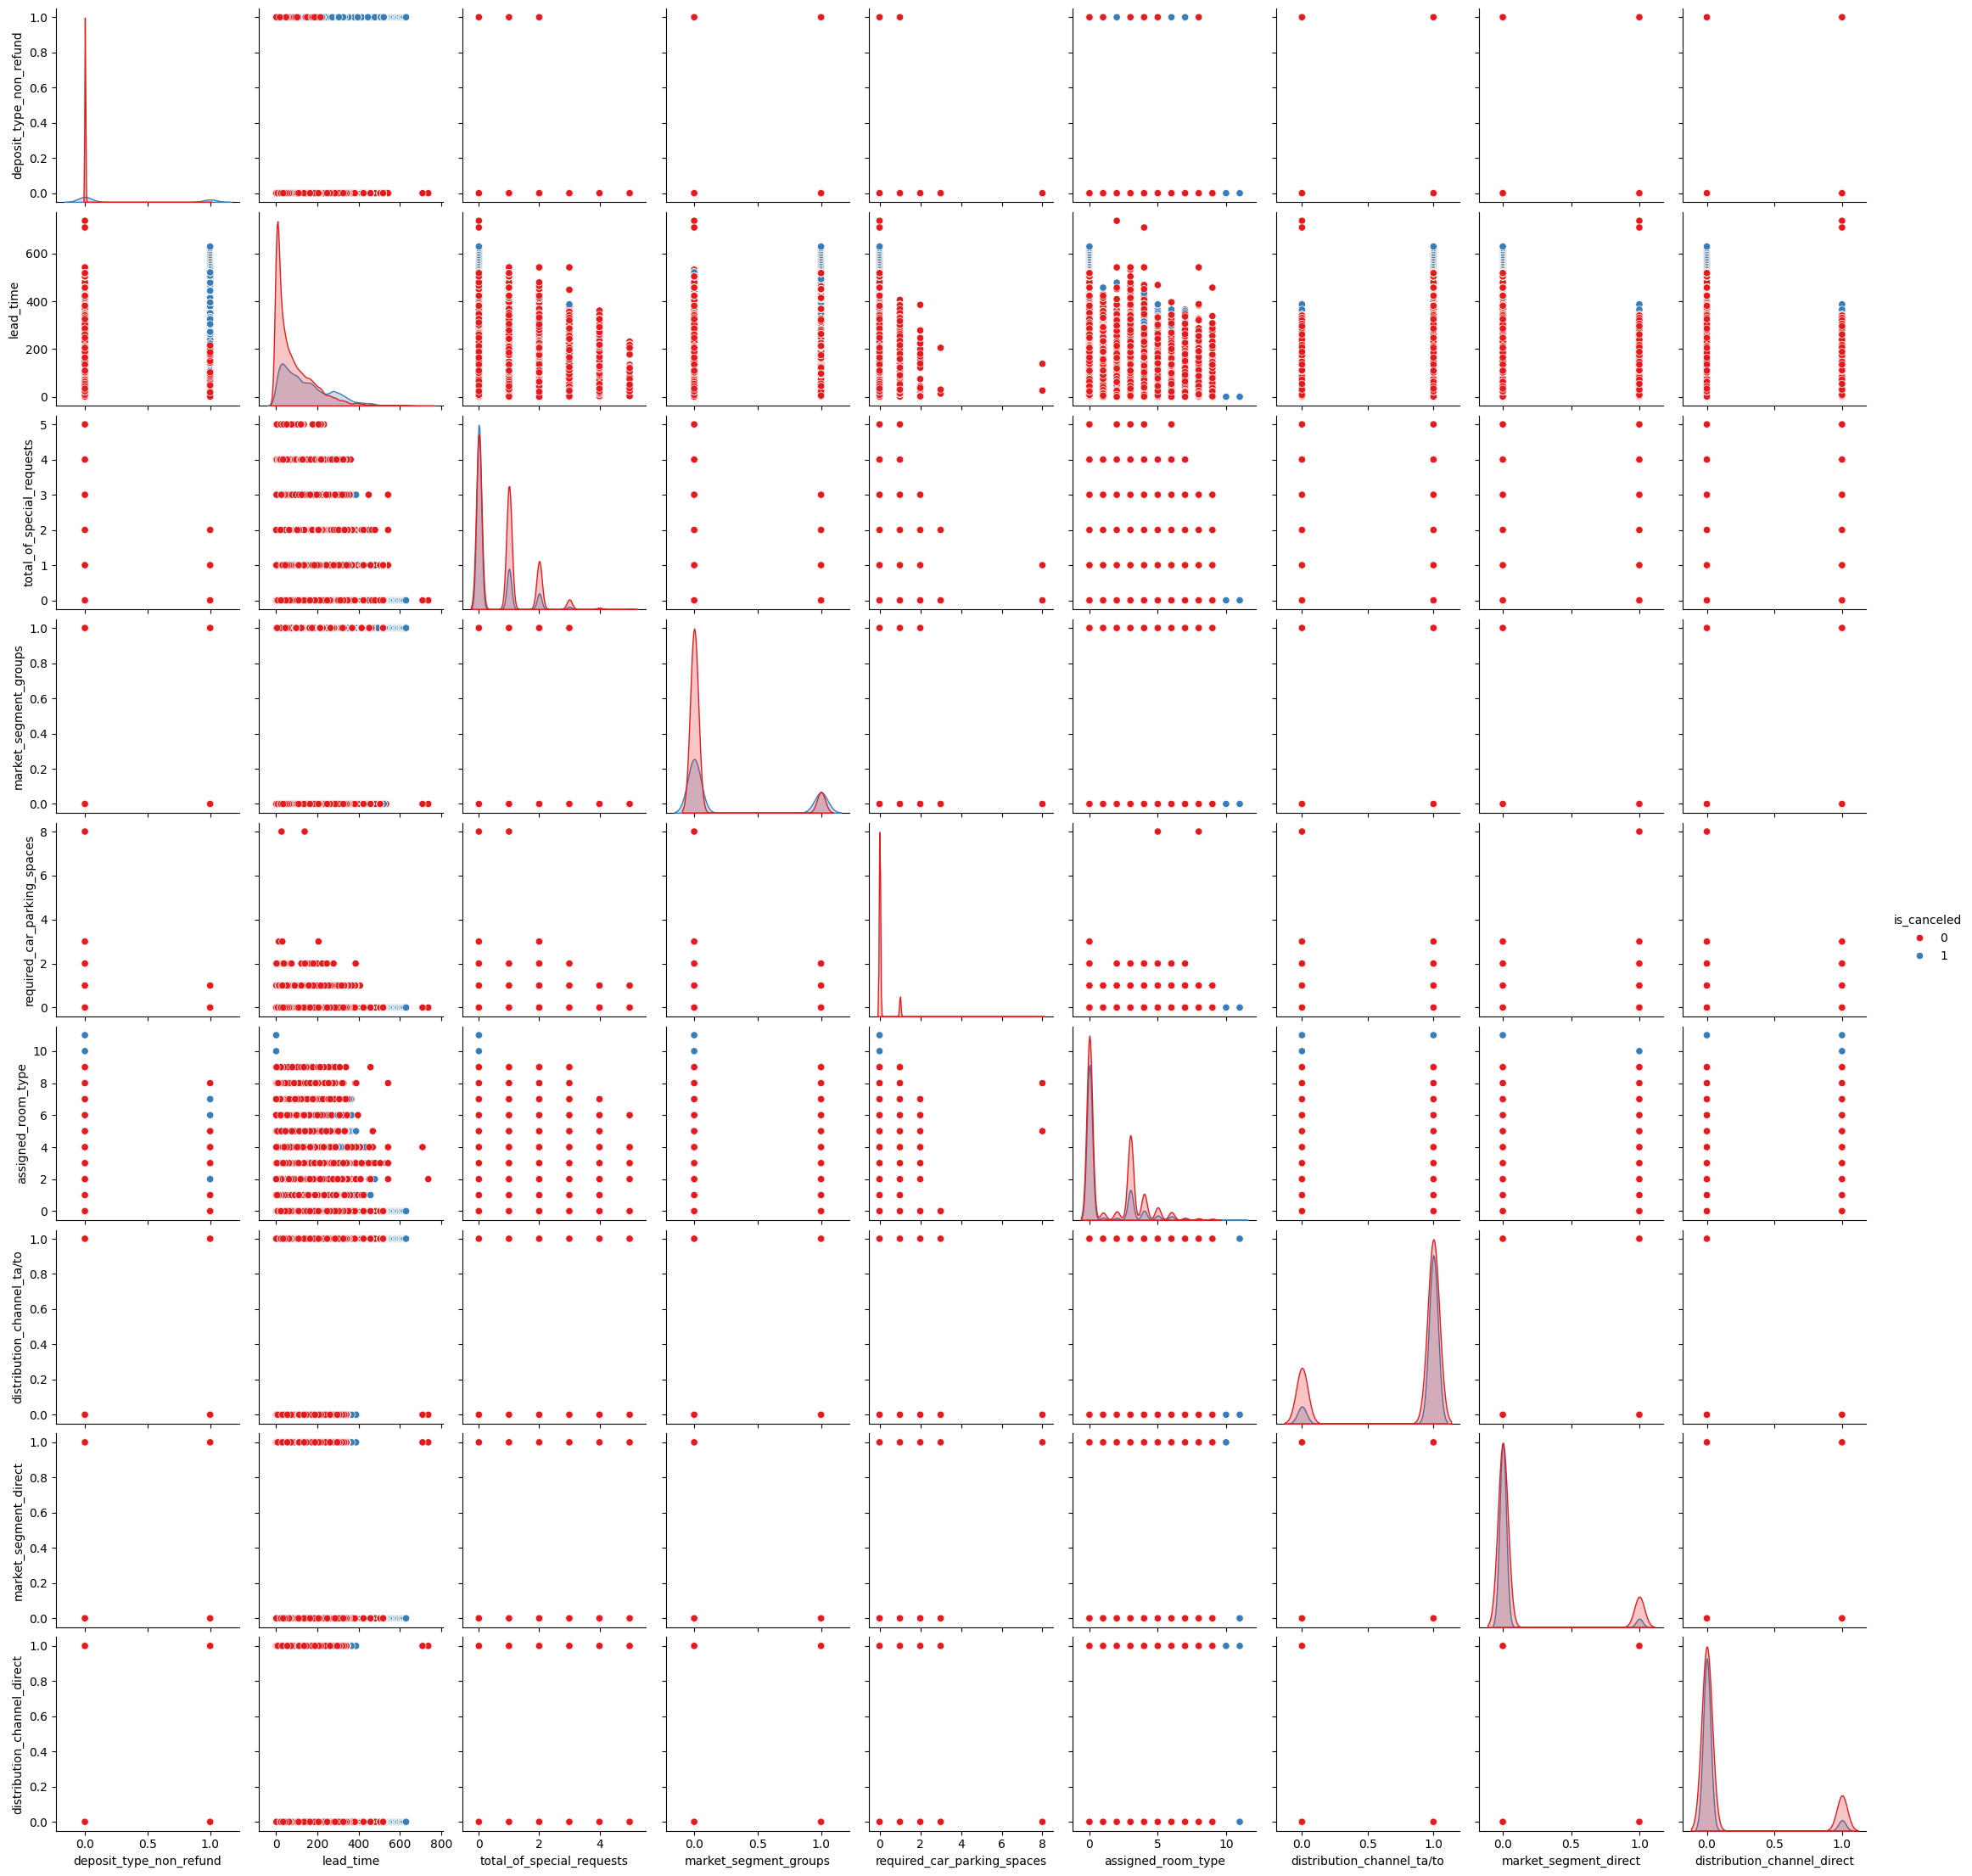

In [ ]:
sns.pairplot(df_data_topf, hue=target_column, palette='Set1')

<Axes: >

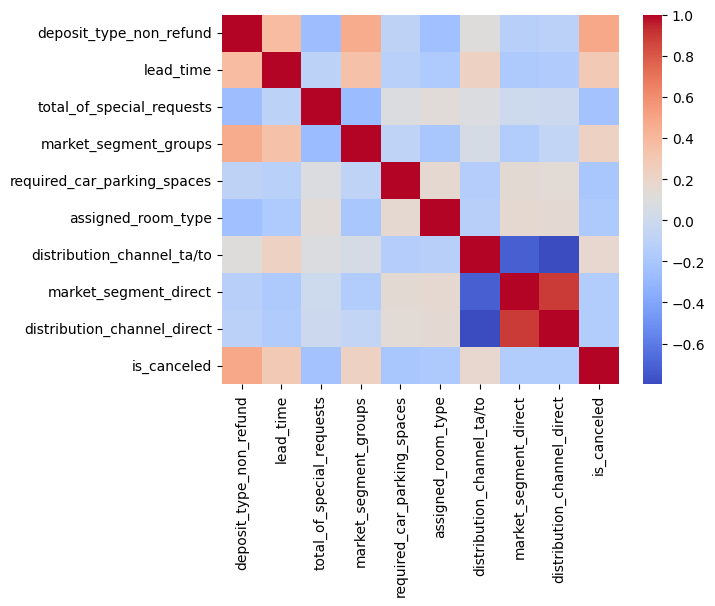

In [ ]:
sns.heatmap(df_data_topf.corr(), cmap='coolwarm')

<Axes: xlabel='is_canceled', ylabel='deposit_type_non_refund'>

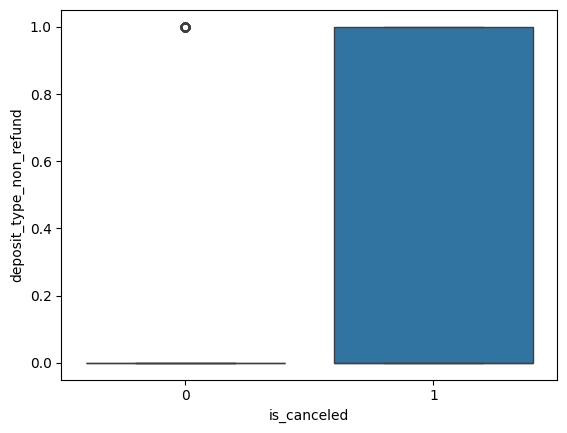

In [ ]:
sns.boxplot(x=target_column, y='deposit_type_non_refund', data=df_data_topf)

In [ ]:
# Probamos la función de selctKbest features a ver si nos da características diferentes a las que hemos visto
from sklearn.feature_selection import SelectKBest, f_classif

y_kfeat = df_data_preprocessed[target_column]
X_kfeat = df_data_preprocessed.drop(columns=target_column)

X_train, X_test, y_train, y_test = train_test_split(X_kfeat, y_kfeat, test_size=0.2, random_state=42)

selector = SelectKBest(f_classif, k=5)
X_train_feat = selector.fit_transform(X_train, y_train)
X_test_feat = selector.transform(X_test)

In [ ]:
selected_features_mask = selector.get_support() # Esto devuelve un array booleano [True, False, True, ...]
selected_feature_names = X_train.columns[selected_features_mask]

In [ ]:
X_train_feat_df = pd.DataFrame(X_train_feat, columns=selected_feature_names, index=X_train.index)
X_test_feat_df = pd.DataFrame(X_test_feat, columns=selected_feature_names, index=X_test.index)

In [ ]:
X_train_feat_df

,lead_time,required_car_parking_spaces,total_of_special_requests,market_segment_groups,deposit_type_non_refund
67702,64.0,0.0,0.0,0.0,0.0
115851,34.0,0.0,0.0,0.0,0.0
57345,8.0,0.0,0.0,0.0,0.0
11622,251.0,0.0,1.0,0.0,0.0
33333,23.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
76820,2.0,1.0,0.0,0.0,0.0
110268,91.0,0.0,0.0,0.0,0.0
103694,74.0,0.0,0.0,0.0,0.0
860,130.0,0.0,2.0,0.0,0.0


In [ ]:
# Vamos a escalar lead_time

scaler = StandardScaler()

X_train_scaled_leadtime = scaler.fit_transform(X_train_feat_df[['lead_time']])
X_test_scaled_leadtime = scaler.transform(X_test_feat_df[['lead_time']])

X_train_scaled_df = pd.DataFrame(X_train_scaled_leadtime, columns=['lead_time'], index=X_train_feat_df.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_leadtime, columns=['lead_time'], index=X_test_feat_df.index)

columns_to_concat = ['required_car_parking_spaces', 'total_of_special_requests', 'market_segment_groups', 'deposit_type_non_refund']
X_train_final = pd.concat([X_train_scaled_df, X_train_feat_df[columns_to_concat]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_feat_df[columns_to_concat]], axis=1)

In [ ]:
import pandas as pd
import numpy as np

def explorar_valores_columna(df, top_n_values=5):
    """
    Explora y muestra los valores y estadísticas clave para cada columna de un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame a explorar.
        top_n_values (int): El número de valores más frecuentes a mostrar
                              para columnas categóricas/object.
    """
    print(f"Explorando DataFrame con {df.shape[0]} filas y {df.shape[1]} columnas.\n")

    for col in df.columns:
        print(f"--- Columna: '{col}' ---")
        print(f"Tipo de Dato: {df[col].dtype}")
        print(f"Valores Nulos: {df[col].isnull().sum()} ({df[col].isnull().sum() / len(df) * 100:.2f}%)")
        print(f"Valores Únicos: {df[col].nunique()}")

        # Manejo de tipos de datos para mostrar la información relevante
        if pd.api.types.is_numeric_dtype(df[col]):
            # Es numérica
            print(f"Mínimo: {df[col].min()}")
            print(f"Máximo: {df[col].max()}")
            print(f"Media: {df[col].mean():.2f}")
            print(f"Mediana: {df[col].median():.2f}")
            print(f"Desviación Estándar: {df[col].std():.2f}")
        elif pd.api.types.is_bool_dtype(df[col]):
            # Es booleana
            print("Conteo de Valores:")
            print(df[col].value_counts())
        else:
            # Es categórica (object, category)
            if df[col].nunique() <= top_n_values * 5: # Mostrar todos si no hay demasiados únicos
                 print("Valores Únicos (todos):")
                 print(df[col].unique())
            else: # Si hay muchos valores únicos, mostrar solo los más frecuentes
                print(f"Top {top_n_values} Valores Más Frecuentes:")
                print(df[col].value_counts().head(top_n_values))
        print("-" * 40 + "\n")


explorar_valores_columna(df=X_train_feat_df)

Explorando DataFrame con 95512 filas y 5 columnas.

--- Columna: 'lead_time' ---
Tipo de Dato: float64
Valores Nulos: 0 (0.00%)
Valores Únicos: 477
Mínimo: 0.0
Máximo: 737.0
Media: 103.92
Mediana: 69.00
Desviación Estándar: 106.85
----------------------------------------

--- Columna: 'required_car_parking_spaces' ---
Tipo de Dato: float64
Valores Nulos: 0 (0.00%)
Valores Únicos: 5
Mínimo: 0.0
Máximo: 8.0
Media: 0.06
Mediana: 0.00
Desviación Estándar: 0.25
----------------------------------------

--- Columna: 'total_of_special_requests' ---
Tipo de Dato: float64
Valores Nulos: 0 (0.00%)
Valores Únicos: 6
Mínimo: 0.0
Máximo: 5.0
Media: 0.57
Mediana: 0.00
Desviación Estándar: 0.79
----------------------------------------

--- Columna: 'market_segment_groups' ---
Tipo de Dato: float64
Valores Nulos: 0 (0.00%)
Valores Únicos: 2
Mínimo: 0.0
Máximo: 1.0
Media: 0.17
Mediana: 0.00
Desviación Estándar: 0.37
----------------------------------------

--- Columna: 'deposit_type_non_refund' ---
Ti

# Regresión Logistica (Gaizka)

Viendo los posibles valroes de las features más relevantes tendremos que escalar parte de las características para que sean más manejables para nuestro modelo:

In [ ]:
features_to_scale = [
    'lead_time',
    'total_of_special_requests',
    'required_car_parking_spaces',
    'assigned_room_type'
]

features_no_scale = [
    'deposit_type_non_refund',
    'market_segment_groups',
    'distribution_channel_ta/to',
    'market_segment_direct',
    'distribution_channel_direct'
]

In [ ]:
X = df_data_topf.drop(columns=target_column)
y = df_data_topf[target_column]

NameError: name 'df_data_topf' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Instanciar el escalador
scaler = StandardScaler()

# Ajustar el escalador SOLO en los datos de entrenamiento para las columnas específicas
X_train_scaled_parts = scaler.fit_transform(X_train[features_to_scale])

# Transformar los datos de prueba usando el mismo escalador ajustado
X_test_scaled_parts = scaler.transform(X_test[features_to_scale])

# Convertir los resultados escalados de nuevo a DataFrame para mantener los nombres de las columnas
X_train_scaled_df = pd.DataFrame(X_train_scaled_parts, columns=features_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_parts, columns=features_to_scale, index=X_test.index)

# Recombinar las columnas escaladas con las no escaladas
# Asegúrate de que las columnas no escaladas se seleccionen correctamente
X_train_final = pd.concat([X_train_scaled_df, X_train[features_no_scale]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test[features_no_scale]], axis=1)

In [ ]:
X_train_final

,lead_time,required_car_parking_spaces,total_of_special_requests,market_segment_groups,deposit_type_non_refund
67702,-0.373594,0.0,0.0,0.0,0.0
115851,-0.654357,0.0,0.0,0.0,0.0
57345,-0.897685,0.0,0.0,0.0,0.0
11622,1.376493,0.0,1.0,0.0,0.0
33333,-0.757303,0.0,1.0,0.0,0.0
...,...,...,...,...,...
76820,-0.953837,1.0,0.0,0.0,0.0
110268,-0.120908,0.0,0.0,0.0,0.0
103694,-0.280007,0.0,0.0,0.0,0.0
860,0.244084,0.0,2.0,0.0,0.0


In [ ]:
X_test_final

,lead_time,required_car_parking_spaces,total_of_special_requests,market_segment_groups,deposit_type_non_refund
30946,0.927273,0.0,0.0,0.0,0.0
40207,-0.205137,0.0,0.0,0.0,0.0
103708,-0.738586,0.0,1.0,0.0,0.0
85144,-0.963196,0.0,0.0,0.0,0.0
109991,-0.317442,0.0,0.0,0.0,0.0
...,...,...,...,...,...
48376,1.376493,0.0,0.0,1.0,1.0
19712,0.449976,0.0,0.0,0.0,0.0
32188,-0.598204,0.0,0.0,1.0,0.0
92983,0.047550,0.0,0.0,0.0,0.0


Una vez escaladas las características que requeríamos entrenaremos nuestro modelo

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Entrenamos un modelo usando GridSearchCV para encontrar los mejores hiperparámetros
dict_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2',  'elasticnet'],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)), # Luego, aplicamos SMOTE al conjunto de entrenamiento de cada fold
    ('logisticregression', LogisticRegression(max_iter=200, random_state=42, class_weight='balanced'))
])

param_grid = [
    # Combinaciones para solver='liblinear' (solo 'l1' y 'l2')
    {
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logisticregression__solver': ['liblinear'],
        'logisticregression__penalty': ['l1', 'l2']
    },
    # Combinaciones para solver='saga' (soporta 'l1', 'l2', 'elasticnet')
    {
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logisticregression__solver': ['saga'],
        'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
        # l1_ratio solo es relevante si penalty es 'elasticnet'
        'logisticregression__l1_ratio': [0.1, 0.5, 0.9] # Este se probará solo cuando penalty sea 'elasticnet'
    }
]

modelo_rl = LogisticRegression(max_iter=200, random_state=42, class_weight='balanced') # Añadimos aqui balanced class para dar más importancia a la clase minoritaria (cancelaciones)
modelo_rl_cv = GridSearchCV(pipeline, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=2)
modelo_rl_cv.fit(X_train_final, y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=200,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression__solver': ['liblinear']},
                         {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                          'logisticregression__l1_ratio': [0.1, 0.5, 0.9],
                          'logisticregression__penalty': ['l1', 'l2',
                                                          'elasticnet'],
                          'logisticregression__solver': ['saga']}],
             scoring='f1', verbose=2)

In [ ]:
# Mostramos los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros encontrados: {modelo_rl_cv.best_params_}")
print(f"Mejor score obtenido: {modelo_rl_cv.best_score_:.2%}")

Mejores hiperparámetros encontrados: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Mejor score obtenido: 59.97%


In [ ]:
best_model_pipeline = modelo_rl_cv.best_estimator_
y_pred = best_model_pipeline.predict(X_test_final) # Usa X_test ORIGINAL si tu pipeline tiene preprocesador
y_prob = best_model_pipeline.predict_proba(X_test_final)[:, 1] # Usa X_test ORIGINAL

In [ ]:
# Entrenamos el modelo con los mejores hiperparámetros encontrados
modelo_rl = LogisticRegression(**modelo_rl_cv.best_params_, max_iter=500, random_state=42)
modelo_rl.fit(X_train_final, y_train)

TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'logisticregression__C'

Hacemos las predicciones:


In [ ]:
# Hacemos predicciones sobre el conjunto de test
y_pred = modelo_rl.predict(X_test_final)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Verificamos las clases del modelo
print(f"Clases del modelo: {modelo_rl.classes_}")

Clases del modelo: [0 1]


In [ ]:
y_prob = modelo_rl.predict_proba(X_test_final)[:,1]
y_prob

array([0.34477194, 0.26314009, 0.45681852, ..., 0.44403064, 0.32450286,
       0.38131862])

In [ ]:
# Obtenemos las probabilidades de pertenencia a la clase positiva (1)
# En este caso, la clase positiva es 'Enfermedad'
y_proba = modelo_rl.predict_proba(X_test_final)[:, 1]

In [ ]:
# Para hacerlo de manera dinámica sería así
canceled = np.where(modelo_rl.classes_ == 1)[0][0]
y_proba = modelo_rl.predict_proba(X_test_final)[:, canceled]

In [ ]:
# Mostramos las primeras 5 etiquetas reales, las probabilidades de pertenencia a la clase positiva y las predicciones
print(f"Primeras 5 etiquetas reales: {y_test.iloc[:5].values}")
print(f"Primeras 5 probabilidades: {y_prob[:5]}")
print(f"Primeras 5 predicciones: {y_pred[:5]}")

Primeras 5 etiquetas reales: [0 1 0 0 0]
Primeras 5 probabilidades: [0.59995717 0.48954111 0.34083598 0.41552798 0.47846709]
Primeras 5 predicciones: [1 0 0 0 0]


In [ ]:
# Obtención de las métricas de evaluación
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cálculo del AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy:  {acc:.2f}")
print(f"Precisión: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-Score:  {f1:.2f}")
print(f"AUC:       {auc:.2f}\n")

Accuracy:  0.73
Precisión: 0.68
Recall:    0.55
F1-Score:  0.61
AUC:       0.78



In [ ]:
# Gracias a la función classification_report podemos obtener un reporte detallado de las métricas de evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80     14907
           1       0.68      0.55      0.61      8971

    accuracy                           0.73     23878
   macro avg       0.72      0.70      0.70     23878
weighted avg       0.73      0.73      0.73     23878



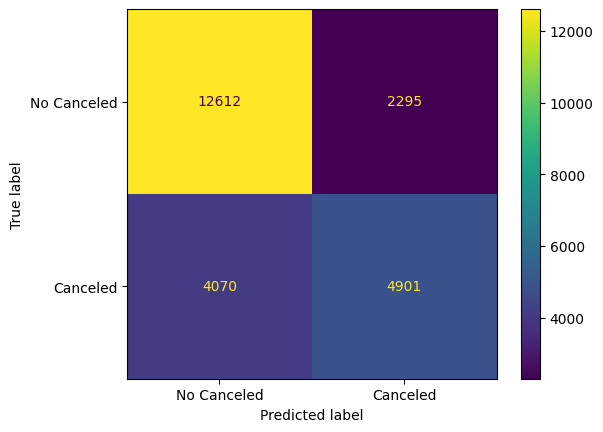

In [ ]:
# Mostramos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Canceled', 'Canceled'])
disp.plot()
plt.show()

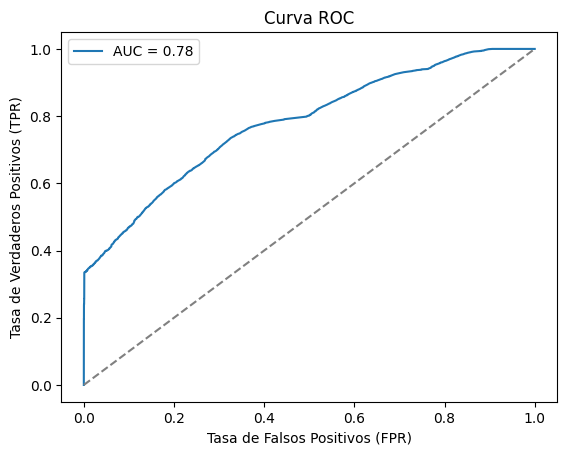

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [ ]:
# Versión de Plotly de la curva ROC
fig = px.area(
    x=fpr,
    y=tpr,
    title=f'ROC Curve (AUC={auc:.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

Mejor Umbral para F1: 0.4278
F1-Score en este umbral: 0.6459
Precisión en este umbral: 0.5707
Recall en este umbral: 0.7440


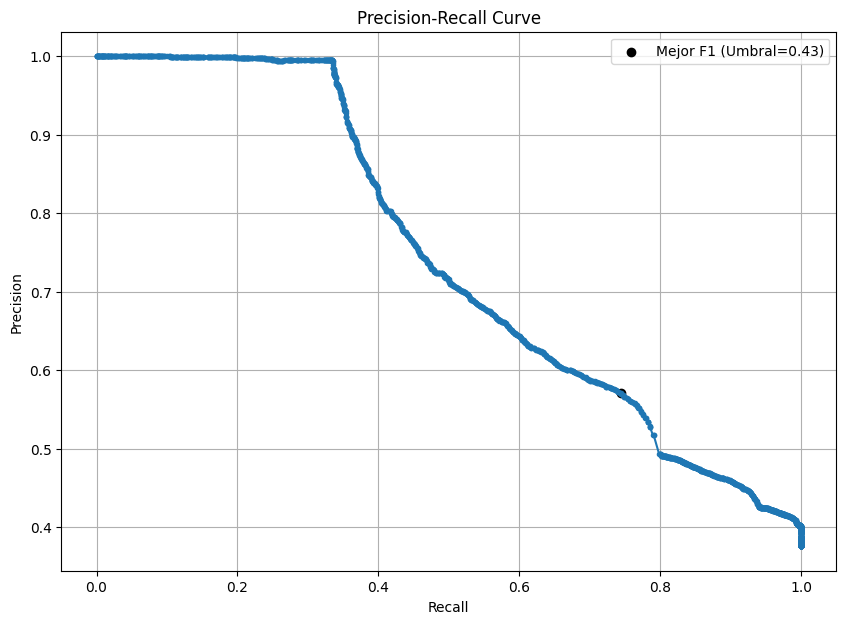


Informe de clasificación con umbral ajustado:
              precision    recall  f1-score   support

           0       0.81      0.66      0.73     14907
           1       0.57      0.74      0.65      8971

    accuracy                           0.69     23878
   macro avg       0.69      0.70      0.69     23878
weighted avg       0.72      0.69      0.70     23878



In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Obtén el mejor estimador del GridSearchCV
best_model = modelo_rl_cv.best_estimator_

# Obtén las probabilidades en el conjunto de prueba
y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]

# Calcula la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Encuentra el umbral que maximiza el F1-score
fscores = (2 * precision * recall) / (precision + recall)
# Evitar NaN si hay divisiones por cero (cuando precision + recall es 0)
fscores = np.nan_to_num(fscores)
ix = np.argmax(fscores)
optimal_threshold = thresholds[ix]
optimal_f1 = fscores[ix]
optimal_precision = precision[ix]
optimal_recall = recall[ix]

print(f"Mejor Umbral para F1: {optimal_threshold:.4f}")
print(f"F1-Score en este umbral: {optimal_f1:.4f}")
print(f"Precisión en este umbral: {optimal_precision:.4f}")
print(f"Recall en este umbral: {optimal_recall:.4f}")

# Graficar la curva Precision-Recall
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.scatter(optimal_recall, optimal_precision, marker='o', color='black', label=f'Mejor F1 (Umbral={optimal_threshold:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Evalúa el modelo con el umbral óptimo
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)
from sklearn.metrics import classification_report
print("\nInforme de clasificación con umbral ajustado:")
print(classification_report(y_test, y_pred_adjusted))

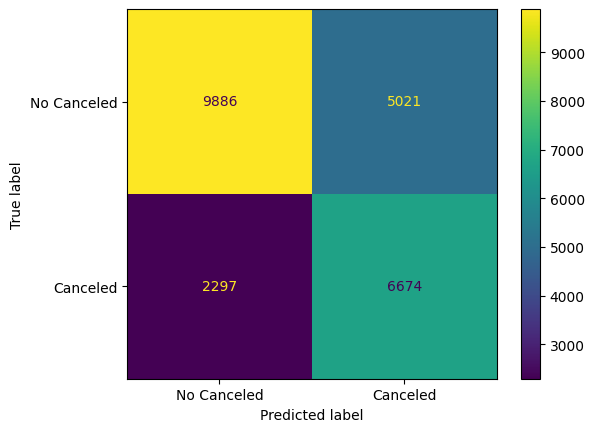

In [ ]:
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Canceled', 'Canceled'])
disp.plot()
plt.show()

# Logistic Regression
*texto en cursiva*

In [ ]:
#
#Esto es una clase que se instanciará por cada uno de los modelos que vamos a comparar.
#               -----------------------
#               |     Clase Base      |
#               -----------------------
#               | *Visualización.     |
#               | *Constr de tablas   |
#               |  comparativas.      |
#               | *Mét. abstractos    |
#               | *Algo más?          |
#               ----------------------
#                   /             \
#                  /               \
#             ------------     ------------
#             | Clase ML |     | Clase DL |
#             ------------     ------------
#             |ImplMétAbs|     |ImplMétAbs|
#             ------------     ------------
# Así el usuario accedera desde la clase base sin tener que conocer las particularidades de un tipo de modelo y otro
# haciendolo así más accesible. En consecuencia, muchos de los parámetros tendrán que poder ser configurables, pero no necesarios
# es decir, usar valores predeterminados.

#Función para la clase base

#A continuacíon se definen las funciones principales de la clase ML
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)

def train(model: BaseEstimator, X_train, y_train, param_grid: dict, scoring: str):
  """
  Entrena un modelo de sklearn con GridSearchCV
  """
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
  result=grid.fit(X_train, y_train)
  #logger.info(f"Se entrena {type(model).__name__} con lo hiperparámetros {grid.best_params_} y con un score promedio en CV de, {grid.best_score_}")
  return result


def evaluate(model: BaseEstimator, X_test, y_test):
  """
  Evalua los modelos y devuelve las distintas métricas para poder compararlas después.
  """
  y_pred = model.predict(X_test)
  try: #No todos los modelos tienen predict_proba, ver si los requeridos sí y si eso eliminar el try.
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
  except AttributeError:
    roc_auc = None

  results = {
      "accuracy": accuracy_score(y_test, y_pred),
      "precision": precision_score(y_test, y_pred),
      "recall": recall_score(y_test, y_pred),
      "f1": f1_score(y_test, y_pred),
      "roc_auc": roc_auc
  }
  #logger.info(f"Métricas calculadas correctamente")
  return results

In [ ]:
#Prueba dummy
X = df_data_preprocessed[['lead_time','booking_changes']]
y = df_data_preprocessed['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)
param_grid={
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

result=train(LogisticRegression(), X_train, y_train, param_grid, 'accuracy')
result.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
evaluate(result, X_test, y_test)

{'accuracy': 0.6740933076472067,
 'precision': 0.6122492080253432,
 'recall': 0.3277557942340305,
 'f1': 0.42695139911634755,
 'roc_auc': np.float64(0.7119851946595575)}

In [ ]:
one_hot_encod=['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type', 'deposit_type']
label_encod=['arrival_date_month', 'reserved_room_type']

df_data = pd.read_csv("/content/dataset_practica_final.csv")
df_data_preprocessed = pre_process(df_data, label_encod, one_hot_encod)
df_data_preprocessed.columns

/tmp/ipython-input-7-3902288661.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_preprocessed[col] = df_data_preprocessed[col].replace(conv_dict)


Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'hotel_resort_hotel', 'meal_fb', 'meal_hb',
       'meal_sc', 'meal_undefined', 'market_segment_complementary',
       'market_segment_corporate', 'market_segment_direct',
       'market_segment_groups', 'market_segment_offline_ta/to',
       'market_segment_online_ta', 'market_segment_undefined',
       'distribution_channel_direct', 'distribution_channel_gds',
       'distribution_channel_ta/to', 'distribu

## Red Neuronal

In [32]:
!pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/ea/09/1c02aa24daf7a003c06f629fbb69dc9ae1bda1b247d7b8981e550d752ac9/scikeras-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for keras>=3.2.0 from https://files.pythonhosted.org/packages/95/e6/4179c461a5fc43e3736880f64dbdc9b1a5349649f0ae32ded927c0e3a227/keras-3.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/8f/aa/ba0014cc4659328dc818a28827be78e6d97312ab0cb98105a770924dc11e/absl_py-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/b2/bc/465daf1de06409cdd4532082806770ee0d8d7df434da79c76564d0f69741/namex-0.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/a2/24/f29c7c819402b342020622304092a1607d6e8e8ede76610a3075663a19a7/optree-0.16.0-cp311-cp311-win_amd64.whl.met

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier # O KerasRegressor si es un problema de regresión
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential # Import Sequential directly
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout # Import specific layer types
from tensorflow.keras.optimizers import Adam
# Puedes añadir más métricas si lo necesitas
# from tensorflow.keras.metrics import Precision, Recall, AUC

np.random.seed(42)

y_kfeat = df_data_preprocessed[target_column]
X_kfeat = df_data_preprocessed.drop(columns=target_column)

X_train, X_test, y_train, y_test = train_test_split(X_kfeat, y_kfeat, test_size=0.2, random_state=42)

def create_cnn_model(input_shape, num_classes, pool_size=2 filters=32, kernel_size=3, dense_units=64, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    # Primera capa convolucional
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size)) # Reduce la dimensionalidad

    # Aplanar la salida para conectarla a capas densas (fully connected)
    model.add(Flatten())

    # Capa densa
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Capa de salida
    if num_classes == 2: # Clasificación binaria
        model.add(Dense(1, activation='sigmoid'))
        loss_func = 'binary_crossentropy'
        metrics_list = ['accuracy']
    else: # Clasificación multiclase
        model.add(Dense(num_classes, activation='softmax'))
        loss_func = 'sparse_categorical_crossentropy' # O 'categorical_crossentropy' si y_train es one-hot encoded
        metrics_list = ['accuracy']

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_func, metrics=metrics_list)
    return model


input_shape_cnn = (X_train.shape[1], 1)
num_classes = len(np.unique(y_train)) # Número de clases de tu variable objetivo (ej. 2 para binario)

# Prueba la creación del modelo
my_cnn_model = create_cnn_model(input_shape=input_shape_cnn, num_classes=num_classes)
my_cnn_model.summary()

# Crea el KerasClassifier usando la función create_cnn_model
# verbose=0 es importante para no llenar la salida del GridSearch
cnn_model_wrapper = KerasClassifier(model=create_cnn_model, verbose=0,
                                    # Pasa los argumentos fijos de la función del modelo aquí
                                    model__input_shape=input_shape_cnn,
                                    model__num_classes=num_classes)

# Define el Pipeline: Selector de características -> Escalador -> Modelo CNN
pipeline_cnn = Pipeline([
    ('selector', SelectKBest()), # Selector sin parámetros fijos aquí
    ('scaler', StandardScaler()), # El escalado es crucial antes de la CNN

    # NOTA: KerasClassifier de Scikeras se encargará de la remodelación (reshape)
    # automáticamente si la input_shape del modelo Keras es 3D y los datos de entrada
    # del KerasClassifier son 2D.
    ('cnn', cnn_model_wrapper) # Tu KerasClassifier para el modelo CNN
])

# Define el param_grid para GridSearchCV
param_grid_cnn = {
    # Parámetros para SelectKBest
    'selector__score_func': [f_classif, mutual_info_classif],
    'selector__k': [5, 'all'], # Ajusta 'k' a valores razonables para tus datos

    # Parámetros para StandardScaler (puedes añadir otros si quieres tunear escaladores)
    # 'scaler': [StandardScaler(), MinMaxScaler()], # Ejemplo si quisieras probar otro escalador

    # Parámetros específicos de la arquitectura CNN (con prefijo 'cnn__model__')
    'cnn__model__filters': [16, 32], # Número de filtros convolucionales
    'cnn__model__kernel_size': [2, 3], # Tamaño del kernel (pequeño para datos tabulares)
    'cnn__model__pool_size': [2], # Tamaño del pooling (generalmente 2 para Conv1D)
    'cnn__model__dense_units': [32, 64], # Unidades en la capa densa
    'cnn__model__dropout_rate': [0.0, 0.2], # Tasa de dropout para regularización
    'cnn__model__learning_rate': [0.001, 0.0005], # Tasa de aprendizaje del optimizador Adam

    # Parámetros de entrenamiento de la red (con prefijo 'cnn__')
    'cnn__epochs': [10, 20], # Número de épocas para entrenar cada modelo en el grid
    'cnn__batch_size': [16, 32] # Tamaño del batch
}

# Inicializa GridSearchCV
grid_search_cnn = GridSearchCV(estimator=pipeline_cnn,
                               param_grid=param_grid_cnn,
                               scoring='accuracy', # O la métrica que necesites (ej. 'f1', 'roc_auc')
                               cv=3, # Validación cruzada
                               n_jobs=-1, # Usa todos los núcleos de CPU
                               verbose=2) # Para ver el progreso

# Entrena el GridSearch (¡puede tardar bastante!)
# Recuerda pasar tus X_train_original (antes del SelectKBest y escalado)
grid_search_cnn.fit(X_train, y_train) # Asegúrate de usar tus datos reales aquí

# Imprime los mejores resultados
print(f"\nMejor puntuación: {grid_search_cnn.best_score_:.4f}")
print(f"Mejores parámetros: {grid_search_cnn.best_params_}")

# Accede al mejor pipeline entrenado
best_cnn_pipeline = grid_search_cnn.best_estimator_

# Haz predicciones
y_pred = best_cnn_pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 39, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 608)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        38,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,169 (153.00 KB)

 Trainable params: 39,169 (153.00 KB)

 Non-trainable params: 0 (0.00 B)

Fitting 3 folds for each of 512 candidates, totalling 1536 fits


ValueError: 
All the 1536 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1536 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py", line 770, in fit
    self._fit(
  File "/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py", line 862, in _initialize
    self.model_ = self._build_keras_model()
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py", line 433, in _build_keras_model
    model = final_build_fn(**build_params)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: create_cnn_model() got an unexpected keyword argument 'pool_size'
